## Загрузка и обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matchup=pd.read_csv(r'C:\Users\Matvey Wonder\Desktop\учеба\DA\lol_stats\1v1.csv')
stats=pd.read_csv(r'C:\Users\Matvey Wonder\Desktop\учеба\DA\lol_stats\Stats13.1.csv',sep=';')

In [3]:
matchup.tail(10)

,match_id,champ1,champ2,win
1288763,1288763,Galio,Lucian,0
1288764,1288764,Jhin,Kaisa,0
1288765,1288765,Lulu,Blitzcrank,0
1288766,1288766,Kayn,Hecarim,0
1288767,1288767,Karma,Vladimir,0
1288768,1288768,Xerath,Anivia,0
1288769,1288769,Jinx,Tristana,0
1288770,1288770,Bard,Yuumi,0
1288771,1288771,Zac,Viego,1
1288772,1288772,Garen,Elise,0


In [4]:
matchup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288773 entries, 0 to 1288772
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   match_id  1288773 non-null  int64 
 1   champ1    1288773 non-null  object
 2   champ2    1288773 non-null  object
 3   win       1288773 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 39.3+ MB


In [5]:
stats.head(10)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,S,57.63,-31.86,47.68%,91.63%,6.62%,11.98%,1.77
1,Ahri,Mage,MID,S,57.18,4.55,49.50%,94.65%,5.81%,1.73%,2.58
2,Akali,Assassin,MID,S,65.49,4.33,48.41%,75.74%,8.11%,13.02%,2.37
3,Akali,Assassin,TOP,C,39.63,-1.51,45.92%,23.50%,2.55%,13.02%,2.00
4,Akshan,Marksman,MID,A,49.39,0.34,51.62%,66.03%,2.75%,3.79%,2.26
5,Akshan,Marksman,TOP,B,44.58,2.61,51.69%,25.56%,1.01%,3.79%,2.00
6,Alistar,Tank,SUPPORT,B,43.21,-1.03,50.09%,95.95%,2.67%,0.60%,2.46
7,Amumu,Tank,JUNGLE,S,57.41,16.78,52.87%,49.07%,4.44%,5.20%,2.82
8,Amumu,Tank,SUPPORT,A,52.62,1.09,52.39%,50.05%,4.09%,5.20%,2.18
9,Anivia,Mage,MID,S,59.33,9.21,53.22%,86.04%,3.60%,3.56%,3.03


In [6]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    244 non-null    object 
 1   Class   243 non-null    object 
 2   Role    244 non-null    object 
 3   Tier    244 non-null    object 
 4   Score   244 non-null    float64
 5   Trend   244 non-null    float64
 6   Win %   244 non-null    object 
 7   Role %  244 non-null    object 
 8   Pick %  244 non-null    object 
 9   Ban %   244 non-null    object 
 10  KDA     244 non-null    float64
dtypes: float64(3), object(8)
memory usage: 21.1+ KB


In [7]:
matchup.duplicated().sum()

0

In [8]:
stats.duplicated().sum()

0

## Предобработка данных

In [9]:
stats.columns = stats.columns.str.lower()

In [10]:
stats = stats.rename(columns={'win %':'win', 'role %':'popularity', 
                                     'pick %':'pick', 'ban %':'ban'})

In [11]:
null_data = stats[stats.isnull().any(axis=1)]
null_data

,name,class,role,tier,score,trend,win,popularity,pick,ban,kda
71,K'Sante,NaN,TOP,S,62.32,-15.1,47.52%,93.24%,7.24%,15.11%,1.97


Имеется единственный пропуск в таблице. Видимо KSante не смогли определить класс, поскольку он вышел недавно и его геймплей можно отнести сразу к двум классам. Заполним значение на "танк", оно более подходящее.

In [12]:
stats = stats.fillna('Tank')

In [13]:
stats.astype({'role': 'str'}).dtypes

name           object
class          object
role           object
tier           object
score         float64
trend         float64
win            object
popularity     object
pick           object
ban            object
kda           float64
dtype: object

In [14]:
stats['win'] = stats['win'].str.replace('%', '')
stats['pick'] = stats['pick'].str.replace('%', '')
stats['ban'] = stats['ban'].str.replace('%', '')
stats['popularity'] = stats['popularity'].str.replace('%', '')

In [15]:
stats['win'] = stats['win'].astype(float)
stats['pick'] = stats['pick'].astype(float)
stats['ban'] = stats['ban'].astype(float)
stats['popularity'] = stats['popularity'].astype(float)

In [16]:
matchup = matchup.drop('match_id', axis = 1)

In [31]:
matchup['win'] = matchup['win'].astype('int8')
matchup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288773 entries, 0 to 1288772
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   champ1  1288773 non-null  object
 1   champ2  1288773 non-null  object
 2   win     1288773 non-null  int8  
dtypes: int8(1), object(2)
memory usage: 20.9+ MB


Для уменьшения объема данных изменим тип данных на более низкий по количеству знаков. Все рано у нас в таблице только 1 и 0.

## Анализ данных

### Статистика

In [18]:
round(stats.groupby('tier')['win'].mean().reset_index().sort_values(by='win',ascending=False),2)

,tier,win
4,God,50.79
0,A,50.79
1,B,50.71
5,S,50.21
2,C,49.77
3,D,47.90


Сразу хочется отметить, что не стоит ориентироваться на тир чемпиона. Как мы видим общий средний винрейт S тира находится ниже тиров А и В. Скорее всего это связано с популярностью этих чампионов, а чем популярнее герой, тем больше вероятность, что на нем играет новичек или не опытный игрок.

In [19]:
round(stats.groupby('role')['win'].mean().reset_index().sort_values(by='win',ascending=False),2)

,role,win
2,MID,50.66
0,ADC,50.58
4,TOP,50.14
3,SUPPORT,50.00
1,JUNGLE,49.81


In [20]:
round(stats.groupby('role')['win'].median().reset_index().sort_values(by='win',ascending=False),2)

,role,win
2,MID,50.60
0,ADC,50.40
4,TOP,50.26
3,SUPPORT,50.11
1,JUNGLE,49.82


Как по среднему, так и по медианному значению в лидерах линии: mid и adc. Стоит отталкиваться от одиночных линий, которые имеют больше всего влияния на игру. Позиция adc, как и support сильно зависит он напарника по линии, а top меньше всего времени взаимодействует с командой. Jungle имеет самый низкий винрейт из-за своей сложности. Поэтому далее все вниманию стоит уделить линии mid. Для игры одному - это лучший выбор.

In [21]:
top_role_class = round(stats.groupby(['role','class'])['win'].mean().reset_index().sort_values(by='win',ascending=False),2)
top_role_class = top_role_class[top_role_class['role']=='MID']
top_role_class.head()

,role,class,win
13,MID,Support,53.33
14,MID,Tank,52.82
10,MID,Fighter,51.55
11,MID,Mage,50.41
12,MID,Marksman,50.39


В патче 13.1 самый высокий винрейт на mid у класса support и tank.

In [42]:
top_champs = round(stats.groupby(['role','name', 'class'])['win'].mean().reset_index().sort_values(by='win',ascending=False),2)
top_champs.head(10)

,role,name,class,win
117,MID,Singed,Tank,55.15
45,JUNGLE,Maokai,Tank,54.31
101,MID,Kled,Fighter,53.93
107,MID,Nasus,Fighter,53.66
137,MID,Zilean,Support,53.33
9,ADC,Karthus,Mage,53.28
216,TOP,Quinn,Marksman,53.27
243,TOP,Zac,Tank,53.24
78,MID,Anivia,Mage,53.22
84,MID,Cho'Gath,Tank,53.13


Лучшие легенды по показателю побед: Singed 53.30, Anivia 53.22, Sona 53.03. 
Важно заметить, что из магов в списке только Anivia.

In [22]:
top_miders = round(stats.groupby(['role','name'])['win'].mean().reset_index().sort_values(by='win',ascending=False),2)
top_miders = top_miders[top_miders['role']=='MID']
top_miders.head(10)

,role,name,win
117,MID,Singed,55.15
101,MID,Kled,53.93
107,MID,Nasus,53.66
137,MID,Zilean,53.33
78,MID,Anivia,53.22
84,MID,Cho'Gath,53.13
94,MID,Jayce,53.03
123,MID,Tristana,52.62
91,MID,Gragas,52.46
118,MID,Swain,52.37


In [33]:
stats[stats['name'] == 'Singed']

,name,class,role,tier,score,trend,win,popularity,pick,ban,kda
166,Singed,Tank,MID,A,51.22,-7.41,55.15,19.51,0.50,0.61,2.83
167,Singed,Tank,TOP,B,47.15,-0.50,51.45,69.62,1.88,0.61,2.03


Лучшие герои довольно нетипичный выбор на данную линию. Причем стоит отметить, что за исключением некоторый все герои довольно затанкованные. Если иметь возможность наиграть определенного чемпиона, то определенно стоит выбирать Singed. Он имеет низкий ban и pick, что также поможет безприпятственно брать его в каждую игру. Еще стоит отметить, что многие игроки не будут ожидать его против себя на позиции mid и не знают как против него играть.



### Матчапы

In [23]:
def champ_winrate(champion):
    '''
    Функция показывает винрейт чемпиона против всех героев
    '''
    champ_games = matchup.query('champ1 == @champion or champ2 == @champion')
    champ_wins = matchup.query('(champ1 == @champion and win == 1) or (champ2 == @champion and win == 0)')
    print(champion, 'all matchaps winrate:')
    return round(len(champ_wins) / len(champ_games) * 100,2)    

In [24]:
champ_winrate('Singed')

Singed all matchaps winrate:


50.53

Среди всех матчапов 1 на 1 Singed имеет винрейт больше 50%

In [25]:
def matchaps(your_champion, your_opponent):
    '''
    Функция показывает винрейт чемпиона против конкретного героя
    '''
    champs_games = matchup.query('(champ1 == @your_champion and champ2 == @your_opponent) \
    or (champ2 == @your_champion and champ1 == @your_opponent)')
    
    champ_1_wins = matchup.query('(champ1 == @your_champion and champ2 == @your_opponent and win == 1) \
    or (champ2 == @your_champion and champ1 == @your_opponent and win == 0)')
    
    print(your_champion,'against',your_opponent, 'winrate:')
    return round(len(champ_1_wins) / len(champs_games) * 100,2)    

Рассмотрим матчапы Singed против других чампионов на позиции mid в этом патче, с самым высоким винрейтом.

In [26]:
matchaps('Singed', 'Zilean')

Singed against Zilean winrate:


20.0

In [34]:
matchaps('Singed', 'Kled')

Singed against Kled winrate:


55.13

In [35]:
matchaps('Singed', 'Nasus')

Singed against Nasus winrate:


51.39

In [36]:
matchaps('Singed', 'Anivia')

Singed against Anivia winrate:


57.14

На первый взгляд, опасность представляет только Zilean

In [37]:

def all_matchaps(your_champion):
    '''
    Функция показывает 10 чемпионов, против которых у выбранного нами героя меньший винрейт
    '''
    unique_champs = pd.DataFrame(stats['name'].unique())
    unique_champs.columns = ['champion']
    winrate = []
    
    for i in unique_champs['champion']:
        all_champs_games = matchup.query('(champ1 == @your_champion and champ2 == @i) \
        or (champ2 == @your_champion and champ1 == @i)')
        
        all_champ_1_wins = matchup.query('(champ1 == @your_champion and champ2 == @i and win == 1) \
        or (champ2 == @your_champion and champ1 == @i and win == 0)')
        
        if len(all_champ_1_wins) >0:
            x = round(len(all_champ_1_wins) / len(all_champs_games) * 100,2)
            winrate.append(x)
        else:
            winrate.append(0)

    winrate_data = pd.DataFrame(winrate)
    winrate_data['champion'] = unique_champs['champion']
    winrate_data.columns = ['winrate','champion'] 

    winrate_data=winrate_data[winrate_data['winrate']>0]
    
    top_5_conterpicks = winrate_data.sort_values(by='winrate').head(10)
    
    sns.set_style("ticks",{'axes.grid' : True})
    plt.figure(figsize = (10,6))
    ax = sns.barplot(x='champion', y='winrate', data=top_5_conterpicks)

    ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
    ax.set_title('Топ 10 плохих матчапов')
    ax.set_xlabel('Вражеский чампион')
    ax.set_ylabel('Винрейт')
    plt.show()

Рассмотрим самых неудобных противников против чемпиона Singed.

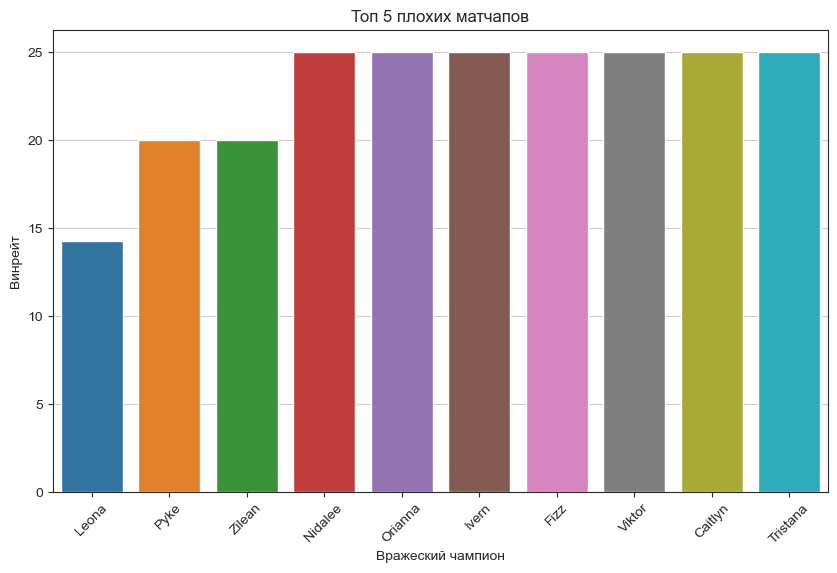

In [38]:
all_matchaps('Singed')

Можно блокировать Zilean, если хотите брать на mid Singed, однако стоит учитывать, что его редко берут на mid. Leona чемпион поддержки и играется только на нижней линии, поэтому будет предстовлять опасность, только начиная с середины игры, когда вы уже будите на пути к победе после успешной линии вначале. Pyke неудобный противник как и Zilean, но его берут на mid редко. Возможно стоит присмотреться к блокировки таких чемпионов как: Orianna, Fizz, Viktor и других более популярных легенд.


## Вывод

Основные особенности патча 13.1:
1. Самый высокий показатель побед на центральной линии и нижней линии.
2. Самый высокий показатель побед у класса поддержки и танков.
3. Лучшие легенды по показателю побед: Singed 53.30, Anivia 53.22, Sona 53.03

Рекомендации: определенно стоит присмотреться к игре на средней линии, при чем за нетипичных героев, в особенности танков.
Моя рекомендация чемпион - Singed. Он имеет низкий ban и pick, что также поможет безприпятственно брать его в каждую игру. Еще стоит отметить, что многие игроки не будут ожидать его против себя на позиции mid и не знают как против него играть.
Лучшие блокировки против этого выбора: Zilean, Orianna, Fizz, Viktor.